In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By

wd = webdriver.Chrome()

wd.get('https://cdn2.byhy.net/files/selenium/sample2.html')

# 根据 class name 选择元素，返回的是 一个列表
elements = wd.find_elements(By.CLASS_NAME, 'plant')

for element in elements:
    print(element.text)

In [2]:
elements

[]

    可以观察到，elements为空列表，表明并没有得到plant对应的元素         这是为何？
    
    如果仔细观察，这些元素都在一个 iframe 元素中 (实际整个根据图片，主要内容全部都在frame中)
        就是均为其子元素
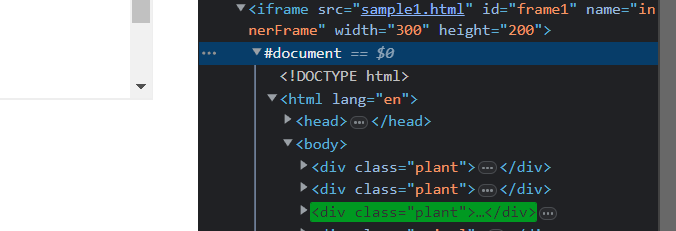

#### 1. 介绍 Iframe 与 frame    
    iframe 与 frame 非常特殊
        内部可以包含一个被嵌入的 html文档，即 html 元素
    使用selenium的driver进行操作的是 当前 html
        而不会直接跳到 (i)frame 内部的 html
        
    因此我们要切换操作范围，webdriver切换html范围
    
    # wd.switch_to.frame(frame_reference)
    
    此时我们有时需要找到对应的 frame 元素, 切换填入 class 或者 id 的属性值
        frame_reference
            可以是frame的属性值 例如id='nide'
    # wd.switch_to.frame('nide')
    
    
    
        然后如何切换回到，该网站的默认html呢
            使用
            wd.switch_to.default_content()

#### 2. 假设需要切换的 frame 没有相应的属性，那么如何完成切换
        此时也可以填写 WebElement 对象
        
        1. 对于此网站， iframe 只有一个，
            用CSS 选择器 查找 tag = iframe 也是可以的
            
        2. 那么假设有很多的iframe，此时也可以根据 src="sample.html"    
            根据CSS 的[src='sample.html'] 来寻找元素对象，src在网站中是唯一的
           代码则是 iframe[src='sample.html'] 表明针对所有iframe，符合条件的
           
        3. 进到 frame 内部操作，仍然对外部是不可接触状态
           因此需要切换回去才能进行操作
           
               # wd.switch_to.default_content()
               该操作可以切换回去

## 3. 窗口切换，与frame切换不一样
        比如点击了一个链接，有的链接会打开一个新的窗口, 增加了一个窗口
            此时如何操作
        此时 webdriver 操作的还是老的窗口

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By

wd = webdriver.Chrome()
wd.implicitly_wait(10)

wd.get('https://cdn2.byhy.net/files/selenium/sample3.html')

# 点击打开新窗口的链接
link = wd.find_element(By.TAG_NAME, "a")
link.click()

# wd.title属性是当前窗口的标题栏 文本
print(wd.title)

白月黑羽测试网页3


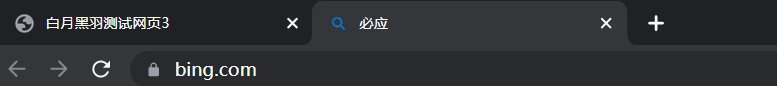
    可以看到此时的wd窗口title还是原先窗口，并没有进行切换

    此时可以使用 wd.switch_to_window(handle)
        
    WebDriver对象有window_handles 属性，这是一个列表对象， 里面包括了当前浏览器里面所有的窗口句柄
    
        表明网页驱动实际有所有窗口的句柄，只是操作时是在特定的一个窗口
        
        如果事先知道窗口的信息，for循环一个一个切换，直到找到符合要求的窗口
            for handle in wd.window_handles:
                # 先切换到该窗口
                wd.switch_to.window(handle)
                # 得到该窗口的标题栏字符串，判断是不是我们要操作的那个窗口
                if 'Bing' in wd.title:
                    # 如果是，那么这时候WebDriver对象就是对应的该该窗口，正好，跳出循环，
                    break
                    
    wd.window_handles作为一个句柄列表，说明其仅仅只包含句柄id

In [4]:
# 有时为我们在 新窗口的 操作结束后，需要切换为原来的窗口，我们可以事先保存 窗口句柄
# mainWindow变量保存当前窗口的句柄
    # mainWindow = wd.current_window_handle

#通过前面保存的老窗口的句柄，自己切换到老窗口
    # wd.switch_to.window(mainWindow)